# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

  Using cached opencv_python_headless-4.5.3.56-cp39-cp39-manylinux2014_x86_64.whl (37.1 MB)
  Using cached matplotlib-3.4.3-cp39-cp39-manylinux1_x86_64.whl (10.3 MB)
  Using cached numpy-1.21.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached Pillow-7.0.0.tar.gz (38.2 MB)
  Using cached bokeh-2.1.1-py3-none-any.whl
  Using cached torch-1.11.0-cp39-cp39-manylinux1_x86_64.whl (750.6 MB)
  Using cached torchvision-0.12.0-cp39-cp39-manylinux1_x86_64.whl (21.0 MB)
  Using cached tqdm-4.63.0-py2.py3-none-any.whl (76 kB)
  Using cached ipywidgets-7.6.5-py2.py3-none-any.whl (121 kB)
  Using cached livelossplot-0.5.4-py3-none-any.whl (22 kB)
  Using cached pytest-7.1.1-py3-none-any.whl (297 kB)
  Using cached pandas-1.3.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached widgetsnbextension-3.5.2-py2.py3-none-any.whl (1.6 MB)
  Using cached py-1.11.0-py2.py3-none-any.whl (98 k

In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [3]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.9.16, pytest-7.4.0, pluggy-1.2.0 -- /home/studio-lab-user/.conda/envs/default/bin/python3.9
cachedir: .pytest_cache
rootdir: /home/studio-lab-user
plugins: anyio-3.6.2
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning FAILED                 [100%]

=================================== FAILURES ===================================
_______________________ test_get_model_transfer_learning _______________________

data_loaders = {'test': <torch.utils.data.dataloader.DataLoader object at 0x7f1297906340>, 'train': <torch.utils.data.dataloader.DataLoader object at 0x7f12979061c0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f1297906190>}

    def test_get_model_transfer_learning(data_loaders):
    
        model = get_model_transfer_learning(n_classes=23)
    
        dataiter = iter(data_lo

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [4]:
batch_size = 128  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 80  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'sgd'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.01 # regularization. Increase this to combat overfitting

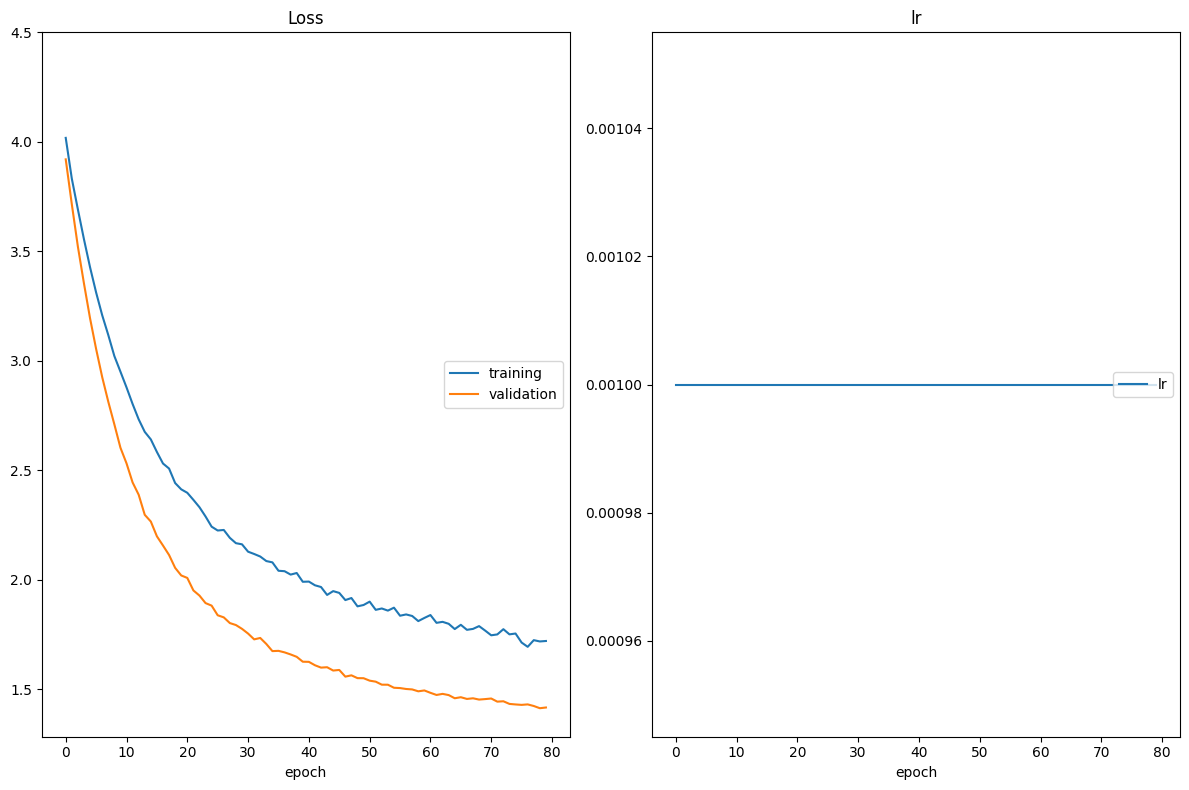

In [5]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(model_name="resnet18",
                                             n_classes=50)# YOUR CODE HERE

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=True
)

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ Depth and Accuracy: ResNet-18 is a relatively deep neural network with 18 layers. Initial Convolutional Layers:

You start with a series of convolutional layers, gradually increasing the number of output channels (or filters) from 64 to 512. Each convolutional layer is followed by batch normalization to stabilize training and improve convergence.
Reasoning: These layers act as feature extractors, capturing low-level features in the input image. Batch normalization helps with faster training and better convergence.
ReLU Activation and MaxPooling:

After each convolutional layer, you apply the ReLU activation function to introduce non-linearity. This helps capture complex patterns and relationships in the data.
Max pooling is applied after every two convolutional layers. It reduces the spatial dimensions of the feature maps while retaining important information.
Reasoning: ReLU introduces non-linearity, which is crucial for capturing complex data patterns. Max pooling reduces the spatial dimensions, making the network more robust to variations in object position and size.
Adaptive Average Pooling:

Added an adaptive average pooling layer after the convolutional layers. This layer automatically adapts the size of the output feature map to a predefined size (in this case, 1x1). It computes the average value of each channel's feature map, effectively summarizing the spatial information.
Reasoning: Adaptive average pooling ensures that the network is invariant to the input image's spatial size, making the model more translation-invariant and reducing overfitting.
Flatten Layer:

You use a flatten layer to reshape the 3D tensor from the adaptive average pooling into a 2D tensor, preparing it for the fully connected layers.
Reasoning: Flattening the tensor is necessary before passing it through fully connected layers.
Fully Connected Classifier:

The classifier consists of two fully connected (linear) layers. The first reduces the dimensionality from 512 to 256, followed by a ReLU activation. The final linear layer produces the output logits for classification.
Reasoning: The fully connected layers perform the final decision-making based on the high-level features extracted by the convolutional layers and adapted by the pooling layers. The ReLU activation introduces non-linearity.
Dropout:

I have incorporated dropout layers with a dropout probability of 0.5 after the flatten layer and after the first fully connected layer.
Reasoning: Dropout helps prevent overfitting by randomly dropping a fraction of units during training, forcing the network to learn more robust features.
In summary, the architecture design follows best practices for building a deep convolutional neural network. It starts with convolutional and pooling layers to extract hierarchical features, incorporates batch normalization for stability, uses adaptive average pooling to summarize spatial information, and ends with fully connected layers for classification. Dropout is applied for regularization. This architecture is suitable for various image classification tasks as it captures both low-level and high-level features while being robust to variations in object position and scale.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [6]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 10/10 [00:10<00:00,  1.05s/it]

Test Loss: 1.261485


Test Accuracy: 69% (874/1250)


1.2614853322505952

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [7]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


In [ ]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)

  0%|                                          | 1/1250 [00:00<04:43,  4.41it/s]/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %388 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
code/__torch__/torchvision/transforms/functional.py:188: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference tr